# 275 Bird Species also see 73 Sports Dataset

今までのPyTorchの学習を活かして、実際にデータを分類してみる。

今回用いるデータは、Kaggleに上がっていた、２７５種類の鳥の分類問題である。

詳細は、https://www.kaggle.com/gpiosenka/100-bird-species

## ライブラリのインポート

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

## デバイスの確認

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## データの前処理

7/1

過学習対策として、データ拡張を行う。

そのために、トレーニングデータとテストデータ別々のtransformを作成する。

In [3]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [4]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [5]:
train_dataset = datasets.ImageFolder('./archive/train', transform=train_transform)
validation_dataset = datasets.ImageFolder('./archive/test', transform=test_transform)

一から学習するので、バッチサイズを変更。

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=8, shuffle=False)

In [7]:
data_iter = iter(train_dataloader)
imgs, labels = data_iter.next()
labels

tensor([ 27, 113,  82,  33,  87, 185, 242, 100])

In [8]:
imgs.size()

torch.Size([8, 3, 224, 224])

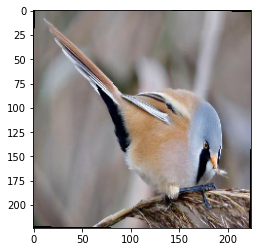

In [9]:
img = imgs[0]
img_permute = img.permute(1, 2, 0)
img_permute = 0.5 * img_permute + 0.5
img_permute = np.clip(img_permute, 0, 1)
plt.imshow(img_permute)

## モデルの構築

7/1

vggに変更して、学習できるか確認する。

In [10]:
vgg = models.vgg16(pretrained=True)

In [11]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

一から学習するので、コメントアウト

In [12]:
# for param in vgg.parameters():
#    param.requires_grad = False

In [13]:
vgg.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(4096, 275)
)

In [14]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
vgg.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 学習・検証

lrを小さめに変更。

epochの数も増やした。

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg.classifier.parameters(), lr=0.0001)

In [17]:
num_epochs = 40
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = vgg(imgs)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = vgg(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc +=torch.mean(val_pred.eq(val_labels).float())
    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)
    print('epoch: {}, loss: {}, acc: {},\t val_loss: {}, val_acc: {}'.format(
        epoch, running_loss, running_acc, val_running_loss, val_running_acc))

C:\Users\lear0\anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 0, loss: 2.5524032404394568, acc: 0.4144482910633087,	 val_loss: 0.9602354835166574, val_acc: 0.7212417125701904
epoch: 1, loss: 1.1819616396209496, acc: 0.6864712238311768,	 val_loss: 0.7350210649462898, val_acc: 0.7795888185501099
epoch: 2, loss: 0.9458667296017097, acc: 0.7483235001564026,	 val_loss: 0.6359187989169715, val_acc: 0.8289036154747009
epoch: 3, loss: 0.8160676877805542, acc: 0.7821580767631531,	 val_loss: 0.587920039085919, val_acc: 0.8443729281425476
epoch: 4, loss: 0.7310738080739945, acc: 0.8064925670623779,	 val_loss: 0.5562030691155304, val_acc: 0.8574543595314026
epoch: 5, loss: 0.675149415845209, acc: 0.8194472789764404,	 val_loss: 0.5474198510402994, val_acc: 0.865448534488678
epoch: 6, loss: 0.6285624581111067, acc: 0.8353738784790039,	 val_loss: 0.6164282505551243, val_acc: 0.8487334251403809
epoch: 7, loss: 0.6112712462818939, acc: 0.8430958986282349,	 val_loss: 0.6280292927780211, val_acc: 0.8500829935073853
epoch: 8, loss: 0.5799742971465003, acc: 0.

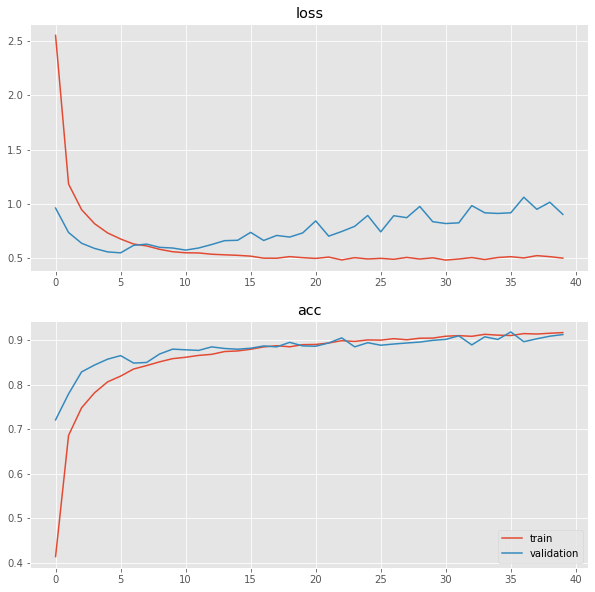

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('loss')
plt.plot(losses, label='train')
plt.plot(val_losses, label='validation')

plt.subplot(2, 1, 2)
plt.title('acc')
plt.plot(accs, label='train')
plt.plot(val_accs, label='validation')

plt.legend()

## まとめ
### 6/30
結果については、過学習が起こっていることが確認できる。そのため、次回は

- データ拡張を行う。
- 正則化を行う。


また、今回遭遇したトラブルは、

- ミニバッチのサイズを大きくすると、GPUがメモリ不足を起こす。
- ミニバッチのサイズと学習率の両方の考慮が必要である。

これらに気を付けて、これからも学習を続ける。

## 7/1
このモデルだと学習が厳しそうなので、次の実装でVGGを用いてみる

VGGを用いた実装がなかなかひどい結果になった。

これは、もっといろいろなことを試す必要がありそう。

明日に向けて

- 学習率をもっと下げてもいいかも
- optimizerのgammaの値を0.75なんかでもいいのかも
- 初期値のパラメータを用いて1から構築してもいいかも（時間かかるし、バッチサイズには気をつけて８でいきたい）


## 7/2

VGGをもちいる